# RTMDet training on custom dataset

Notebook made based on [RTMDet Notebook](https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/train-rtmdet-object-detection-on-custom-data.ipynb) by Roboflow.

## Before start


In [1]:
!nvidia-smi

Sun Jan 14 13:11:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /content


## Install MMDetection and MMYOLO

In [3]:
%cd {HOME}

!pip install torch==2.0.0
!torchvision==0.15.1

%pip install -U -q openmim

!mim install -q "mmengine>=0.6.0"
!mim install -q "mmcv>=2.0.0rc4,<2.1.0"
!mim install -q "mmdet>=3.0.0rc6,<3.1.0"

!git clone https://github.com/open-mmlab/mmyolo.git

%cd {HOME}/mmyolo

%pip install -e .

/content
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 97.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 13.6 MB/s eta 0:00:00
     ━━━━━

**NOTE:** Install additional packages:
- [roboflow](https://github.com/roboflow/roboflow) - open-source datasets
- [supervision](https://github.com/roboflow/supervision) - computer vision utilities

In [4]:
!pip install -q roboflow
!pip install -q supervision==0.13.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
torchdata 0.7.0 requires torch==2.

## Imports

In [5]:
import cv2
import os
import json
import roboflow
import torch
import random
import supervision as sv
import numpy as np

from mmdet.apis import init_detector, inference_detector

## Inference with pre-trained RTMDet COCO model

### Download weights

Start by instantiating a pretrained model. RTMDet architecture comes in five different sizes: `RTMDet-t`, `RTMDet-s`, `RTMDet-m`, `RTMDet-l`, and `RTMDet-x`. We will use `RTMDet-l` throughout this notebook. Keep in mind that depending on your use-case your decision may be different. Take a peek at the diagram below visualizing the speed-accuracy tradeoff.

<br>

| Model | Size | Params(M) | FLOPs(G) | TRT-FP16-Latency(ms) | box AP | TTA box AP | Config | Download |
|:-----:|:----:|:---------:|:--------:|:--------------------:|:------:|:----------:|:------:|:--------:|
|  RTMDet-tiny   | 640  |    4.8    |   8.1    |         0.98         |    41.0     |    42.7     |   [config](https://github.com/open-mmlab/mmyolo/edit/main/configs/rtmdet/rtmdet_tiny_syncbn_fast_8xb32-300e_coco.py)    | [model](https://download.openmmlab.com/mmyolo/v0/rtmdet/rtmdet_tiny_syncbn_fast_8xb32-300e_coco/rtmdet_tiny_syncbn_fast_8xb32-300e_coco_20230102_140117-dbb1dc83.pth) \| [log](https://download.openmmlab.com/mmyolo/v0/rtmdet/rtmdet_tiny_syncbn_fast_8xb32-300e_coco/rtmdet_tiny_syncbn_fast_8xb32-300e_coco_20230102_140117.log.json)  |
| RTMDet-tiny \* | 640  |    4.8    |   8.1    |         0.98         | 41.8 (+0.8) | 43.2 (+0.5) | [config](https://github.com/open-mmlab/mmyolo/edit/main/configs/rtmdet/distillation/kd_tiny_rtmdet_s_neck_300e_coco.py) | [model](https://download.openmmlab.com/mmrazor/v1/rtmdet_distillation/kd_tiny_rtmdet_s_neck_300e_coco/kd_tiny_rtmdet_s_neck_300e_coco_20230213_104240-e1e4197c.pth) \| [log](https://download.openmmlab.com/mmrazor/v1/rtmdet_distillation/kd_tiny_rtmdet_s_neck_300e_coco/kd_tiny_rtmdet_s_neck_300e_coco_20230213_104240-176901d8.json) |
|    RTMDet-s    | 640  |   8.89    |   14.8   |         1.22         |    44.6     |    45.8     |     [config](https://github.com/open-mmlab/mmyolo/edit/main/configs/rtmdet/rtmdet_s_syncbn_fast_8xb32-300e_coco.py)     |       [model](https://download.openmmlab.com/mmyolo/v0/rtmdet/rtmdet_s_syncbn_fast_8xb32-300e_coco/rtmdet_s_syncbn_fast_8xb32-300e_coco_20221230_182329-0a8c901a.pth) \| [log](https://download.openmmlab.com/mmyolo/v0/rtmdet/rtmdet_s_syncbn_fast_8xb32-300e_coco/rtmdet_s_syncbn_fast_8xb32-300e_coco_20221230_182329.log.json)        |
|  RTMDet-s \*   | 640  |   8.89    |   14.8   |         1.22         | 45.7 (+1.1) | 47.3 (+1.5) |  [config](https://github.com/open-mmlab/mmyolo/edit/main/configs/rtmdet/distillation/kd_s_rtmdet_m_neck_300e_coco.py)   |       [model](https://download.openmmlab.com/mmrazor/v1/rtmdet_distillation/kd_s_rtmdet_m_neck_300e_coco/kd_s_rtmdet_m_neck_300e_coco_20230220_140647-446ff003.pth) \| [log](https://download.openmmlab.com/mmrazor/v1/rtmdet_distillation/kd_s_rtmdet_m_neck_300e_coco/kd_s_rtmdet_m_neck_300e_coco_20230220_140647-89862269.json)       |
|    RTMDet-m    | 640  |   24.71   |  39.27   |         1.62         |    49.3     |    50.9     |     [config](https://github.com/open-mmlab/mmyolo/edit/main/configs/rtmdet/rtmdet_m_syncbn_fast_8xb32-300e_coco.py)     |       [model](https://download.openmmlab.com/mmyolo/v0/rtmdet/rtmdet_m_syncbn_fast_8xb32-300e_coco/rtmdet_m_syncbn_fast_8xb32-300e_coco_20230102_135952-40af4fe8.pth) \| [log](https://download.openmmlab.com/mmyolo/v0/rtmdet/rtmdet_m_syncbn_fast_8xb32-300e_coco/rtmdet_m_syncbn_fast_8xb32-300e_coco_20230102_135952.log.json)        |
|  RTMDet-m \*   | 640  |   24.71   |  39.27   |         1.62         | 50.2 (+0.9) | 51.9 (+1.0) |  [config](https://github.com/open-mmlab/mmyolo/edit/main/configs/rtmdet/distillation/kd_m_rtmdet_l_neck_300e_coco.py)   |       [model](https://download.openmmlab.com/mmrazor/v1/rtmdet_distillation/kd_m_rtmdet_l_neck_300e_coco/kd_m_rtmdet_l_neck_300e_coco_20230220_141313-b806f503.pth) \| [log](https://download.openmmlab.com/mmrazor/v1/rtmdet_distillation/kd_m_rtmdet_l_neck_300e_coco/kd_m_rtmdet_l_neck_300e_coco_20230220_141313-bd028fd3.json)       |
|    RTMDet-l    | 640  |   52.3    |  80.23   |         2.44         |    51.4     |    53.1     |     [config](https://github.com/open-mmlab/mmyolo/edit/main/configs/rtmdet/rtmdet_l_syncbn_fast_8xb32-300e_coco.py)     |       [model](https://download.openmmlab.com/mmyolo/v0/rtmdet/rtmdet_l_syncbn_fast_8xb32-300e_coco/rtmdet_l_syncbn_fast_8xb32-300e_coco_20230102_135928-ee3abdc4.pth) \| [log](https://download.openmmlab.com/mmyolo/v0/rtmdet/rtmdet_l_syncbn_fast_8xb32-300e_coco/rtmdet_l_syncbn_fast_8xb32-300e_coco_20230102_135928.log.json)        |
|  RTMDet-l \*   | 640  |   52.3    |  80.23   |         2.44         | 52.3 (+0.9) | 53.7 (+0.6) |  [config](https://github.com/open-mmlab/mmyolo/edit/main/configs/rtmdet/distillation/kd_l_rtmdet_x_neck_300e_coco.py)   |       [model](https://download.openmmlab.com/mmrazor/v1/rtmdet_distillation/kd_l_rtmdet_x_neck_300e_coco/kd_l_rtmdet_x_neck_300e_coco_20230220_141912-c9979722.pth) \| [log](https://download.openmmlab.com/mmrazor/v1/rtmdet_distillation/kd_l_rtmdet_x_neck_300e_coco/kd_l_rtmdet_x_neck_300e_coco_20230220_141912-c5c4e17b.json)       |
|    RTMDet-x    | 640  |   94.86   |  141.67  |         3.10         |    52.8     |    54.2     |     [config](https://github.com/open-mmlab/mmyolo/edit/main/configs/rtmdet/rtmdet_x_syncbn_fast_8xb32-300e_coco.py)     |       [model](https://download.openmmlab.com/mmyolo/v0/rtmdet/rtmdet_x_syncbn_fast_8xb32-300e_coco/rtmdet_x_syncbn_fast_8xb32-300e_coco_20221231_100345-b85cd476.pth) \| [log](https://download.openmmlab.com/mmyolo/v0/rtmdet/rtmdet_x_syncbn_fast_8xb32-300e_coco/rtmdet_x_syncbn_fast_8xb32-300e_coco_20221231_100345.log.json)        |


In [6]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://download.openmmlab.com/mmyolo/v0/rtmdet/rtmdet_s_syncbn_fast_8xb32-300e_coco/rtmdet_s_syncbn_fast_8xb32-300e_coco_20221230_182329-0a8c901a.pth
!ls -lh {HOME}/weights

total 35M
-rw-r--r-- 1 root root 35M Jan  4  2023 rtmdet_s_syncbn_fast_8xb32-300e_coco_20221230_182329-0a8c901a.pth


### Configuration

In [7]:
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
CONFIG_PATH = f"{HOME}/mmyolo/configs/rtmdet/rtmdet_s_syncbn_fast_8xb32-300e_coco.py"
WEIGHTS_PATH = f"{HOME}/weights/rtmdet_s_syncbn_fast_8xb32-300e_coco_20221230_182329-0a8c901a.pth"

### Load model

In [8]:
model = init_detector(CONFIG_PATH, WEIGHTS_PATH, device=DEVICE)

Loads checkpoint by local backend from path: /content/weights/rtmdet_s_syncbn_fast_8xb32-300e_coco_20221230_182329-0a8c901a.pth


## Download dataset from roboflow

In [9]:
!mkdir -p {HOME}/mmyolo/data
%cd {HOME}/mmyolo/data

/content/mmyolo/data


In [10]:
%cd {HOME}

import roboflow
from roboflow import Roboflow

rf = Roboflow(api_key="API_KEY")
project = rf.workspace("roboflow-100").project("animals-ij5d2")
dataset = project.version(2).download("coco-mmdetection")

/content
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to animals-2 in coco-mmdetection:: 100%|██████████| 1008/1008 [00:00<00:00, 5449.96it/s]


## Training RTMDet on your custom dataset

### Configuration

**NOTE:** MMDetection uses configuration files to store information about the model's input resolution, the number of training epochs, learning rate and also the dataset on which we want to train our model. These files are often quite verose but don't worry about it.

The file below was created based on the [configuration file](https://github.com/open-mmlab/mmyolo/blob/main/configs/rtmdet/rtmdet_l_syncbn_fast_8xb32-300e_coco.py) for the RTMDet-L model. Usually the best strategy is to copy the input file and make your changes to it.

In [11]:
BATCH_SIZE = 8
MAX_EPOCHS = 1

In [12]:
CUSTOM_CONFIG_PATH = f"{HOME}/mmyolo/configs/rtmdet/custom.py"

CUSTOM_CONFIG = f"""
_base_ = ['../_base_/default_runtime.py', '../_base_/det_p5_tta.py']

# ========================Frequently modified parameters======================
# -----data related-----
data_root = '{dataset.location}/'

train_ann_file = 'train/_annotations.coco.json'
train_data_prefix = 'train/'

val_ann_file = 'valid/_annotations.coco.json'
val_data_prefix = 'valid/'

class_name = {tuple(sorted(project.classes.keys()))}
num_classes = {len(project.classes)}

metainfo = dict(classes=class_name, palette=[(20, 220, 60)])

train_batch_size_per_gpu = {BATCH_SIZE}
# Worker to pre-fetch data for each single GPU during training
train_num_workers = 4
# persistent_workers must be False if num_workers is 0.
persistent_workers = True

# -----train val related-----
# Base learning rate for optim_wrapper. Corresponding to 8xb16=64 bs
base_lr = 0.004
max_epochs = {MAX_EPOCHS}  # Maximum training epochs
# Change train_pipeline for final 20 epochs (stage 2)
num_epochs_stage2 = 20

model_test_cfg = dict(
    # The config of multi-label for multi-class prediction.
    multi_label=True,
    # The number of boxes before NMS
    nms_pre=30000,
    score_thr=0.001,  # Threshold to filter out boxes.
    nms=dict(type='nms', iou_threshold=0.65),  # NMS type and threshold
    max_per_img=300)  # Max number of detections of each image

# ========================Possible modified parameters========================
# -----data related-----
img_scale = (640, 640)  # width, height
# ratio range for random resize
random_resize_ratio_range = (0.1, 2.0)
# Cached images number in mosaic
mosaic_max_cached_images = 40
# Number of cached images in mixup
mixup_max_cached_images = 20
# Dataset type, this will be used to define the dataset
dataset_type = 'YOLOv5CocoDataset'
# Batch size of a single GPU during validation
val_batch_size_per_gpu = 32
# Worker to pre-fetch data for each single GPU during validation
val_num_workers = 10

# Config of batch shapes. Only on val.
batch_shapes_cfg = dict(
    type='BatchShapePolicy',
    batch_size=val_batch_size_per_gpu,
    img_size=img_scale[0],
    size_divisor=32,
    extra_pad_ratio=0.5)

# -----model related-----
# The scaling factor that controls the depth of the network structure
deepen_factor = 1.0
# The scaling factor that controls the width of the network structure
widen_factor = 1.0
# Strides of multi-scale prior box
strides = [8, 16, 32]

norm_cfg = dict(type='BN')  # Normalization config

# -----train val related-----
lr_start_factor = 1.0e-5
dsl_topk = 13  # Number of bbox selected in each level
loss_cls_weight = 1.0
loss_bbox_weight = 2.0
qfl_beta = 2.0  # beta of QualityFocalLoss
weight_decay = 0.05

# Save model checkpoint and validation intervals
save_checkpoint_intervals = 10
# validation intervals in stage 2
val_interval_stage2 = 1
# The maximum checkpoints to keep.
max_keep_ckpts = 3
# single-scale training is recommended to
# be turned on, which can speed up training.
env_cfg = dict(cudnn_benchmark=True)

# ===============================Unmodified in most cases====================
# https://mmengine.readthedocs.io/en/latest/api/visualization.html
_base_.visualizer.vis_backends = [
    dict(type='LocalVisBackend'), #
    dict(type='TensorboardVisBackend'),]

model = dict(
    type='YOLODetector',
    data_preprocessor=dict(
        type='YOLOv5DetDataPreprocessor',
        mean=[103.53, 116.28, 123.675],
        std=[57.375, 57.12, 58.395],
        bgr_to_rgb=False),
    backbone=dict(
        type='CSPNeXt',
        arch='P5',
        expand_ratio=0.5,
        deepen_factor=deepen_factor,
        widen_factor=widen_factor,
        channel_attention=True,
        norm_cfg=norm_cfg,
        act_cfg=dict(type='SiLU', inplace=True)),
    neck=dict(
        type='CSPNeXtPAFPN',
        deepen_factor=deepen_factor,
        widen_factor=widen_factor,
        in_channels=[256, 512, 1024],
        out_channels=256,
        num_csp_blocks=3,
        expand_ratio=0.5,
        norm_cfg=norm_cfg,
        act_cfg=dict(type='SiLU', inplace=True)),
    bbox_head=dict(
        type='RTMDetHead',
        head_module=dict(
            type='RTMDetSepBNHeadModule',
            num_classes=num_classes,
            in_channels=256,
            stacked_convs=2,
            feat_channels=256,
            norm_cfg=norm_cfg,
            act_cfg=dict(type='SiLU', inplace=True),
            share_conv=True,
            pred_kernel_size=1,
            featmap_strides=strides),
        prior_generator=dict(
            type='mmdet.MlvlPointGenerator', offset=0, strides=strides),
        bbox_coder=dict(type='DistancePointBBoxCoder'),
        loss_cls=dict(
            type='mmdet.QualityFocalLoss',
            use_sigmoid=True,
            beta=qfl_beta,
            loss_weight=loss_cls_weight),
        loss_bbox=dict(type='mmdet.GIoULoss', loss_weight=loss_bbox_weight)),
    train_cfg=dict(
        assigner=dict(
            type='BatchDynamicSoftLabelAssigner',
            num_classes=num_classes,
            topk=dsl_topk,
            iou_calculator=dict(type='mmdet.BboxOverlaps2D')),
        allowed_border=-1,
        pos_weight=-1,
        debug=False),
    test_cfg=model_test_cfg,
)

train_pipeline = [
    dict(type='LoadImageFromFile', backend_args=_base_.backend_args),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(
        type='Mosaic',
        img_scale=img_scale,
        use_cached=True,
        max_cached_images=mosaic_max_cached_images,
        pad_val=114.0),
    dict(
        type='mmdet.RandomResize',
        # img_scale is (width, height)
        scale=(img_scale[0] * 2, img_scale[1] * 2),
        ratio_range=random_resize_ratio_range,
        resize_type='mmdet.Resize',
        keep_ratio=True),
    dict(type='mmdet.RandomCrop', crop_size=img_scale),
    dict(type='mmdet.YOLOXHSVRandomAug'),
    dict(type='mmdet.RandomFlip', prob=0.5),
    dict(type='mmdet.Pad', size=img_scale, pad_val=dict(img=(114, 114, 114))),
    dict(
        type='YOLOv5MixUp',
        use_cached=True,
        max_cached_images=mixup_max_cached_images),
    dict(type='mmdet.PackDetInputs')
]

train_pipeline_stage2 = [
    dict(type='LoadImageFromFile', backend_args=_base_.backend_args),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(
        type='mmdet.RandomResize',
        scale=img_scale,
        ratio_range=random_resize_ratio_range,
        resize_type='mmdet.Resize',
        keep_ratio=True),
    dict(type='mmdet.RandomCrop', crop_size=img_scale),
    dict(type='mmdet.YOLOXHSVRandomAug'),
    dict(type='mmdet.RandomFlip', prob=0.5),
    dict(type='mmdet.Pad', size=img_scale, pad_val=dict(img=(114, 114, 114))),
    dict(type='mmdet.PackDetInputs')
]

test_pipeline = [
    dict(type='LoadImageFromFile', backend_args=_base_.backend_args),
    dict(type='YOLOv5KeepRatioResize', scale=img_scale),
    dict(
        type='LetterResize',
        scale=img_scale,
        allow_scale_up=False,
        pad_val=dict(img=114)),
    dict(type='LoadAnnotations', with_bbox=True, _scope_='mmdet'),
    dict(
        type='mmdet.PackDetInputs',
        meta_keys=('img_id', 'img_path', 'ori_shape', 'img_shape',
                   'scale_factor', 'pad_param'))
]

train_dataloader = dict(
    batch_size=train_batch_size_per_gpu,
    num_workers=train_num_workers,
    persistent_workers=persistent_workers,
    pin_memory=True,
    collate_fn=dict(type='yolov5_collate'),
    sampler=dict(type='DefaultSampler', shuffle=True),
    dataset=dict(
        type=dataset_type,
        data_root=data_root,
        metainfo=metainfo,
        ann_file=train_ann_file,
        data_prefix=dict(img=train_data_prefix),
        filter_cfg=dict(filter_empty_gt=True, min_size=32),
        pipeline=train_pipeline))

val_dataloader = dict(
    batch_size=val_batch_size_per_gpu,
    num_workers=val_num_workers,
    persistent_workers=persistent_workers,
    pin_memory=True,
    drop_last=False,
    sampler=dict(type='DefaultSampler', shuffle=False),
    dataset=dict(
        type=dataset_type,
        data_root=data_root,
        metainfo=metainfo,
        ann_file=val_ann_file,
        data_prefix=dict(img=val_data_prefix),
        test_mode=True,
        batch_shapes_cfg=batch_shapes_cfg,
        pipeline=test_pipeline))

test_dataloader = val_dataloader

# Reduce evaluation time
val_evaluator = dict(
    type='mmdet.CocoMetric',
    proposal_nums=(100, 1, 10),
    ann_file=data_root + val_ann_file,
    metric='bbox')
test_evaluator = val_evaluator

# optimizer
optim_wrapper = dict(
    type='OptimWrapper',
    optimizer=dict(type='AdamW', lr=base_lr, weight_decay=weight_decay),
    paramwise_cfg=dict(
        norm_decay_mult=0, bias_decay_mult=0, bypass_duplicate=True))

# learning rate
param_scheduler = [
    dict(
        type='LinearLR',
        start_factor=lr_start_factor,
        by_epoch=False,
        begin=0,
        end=1000),
    dict(
        # use cosine lr from 150 to 300 epoch
        type='CosineAnnealingLR',
        eta_min=base_lr * 0.05,
        begin=max_epochs // 2,
        end=max_epochs,
        T_max=max_epochs // 2,
        by_epoch=True,
        convert_to_iter_based=True),
]

# hooks
default_hooks = dict(
    checkpoint=dict(
        type='CheckpointHook',
        interval=save_checkpoint_intervals,
        max_keep_ckpts=max_keep_ckpts  # only keep latest 3 checkpoints
    ))

custom_hooks = [
    dict(
        type='EMAHook',
        ema_type='ExpMomentumEMA',
        momentum=0.0002,
        update_buffers=True,
        strict_load=False,
        priority=49),
    dict(
        type='mmdet.PipelineSwitchHook',
        switch_epoch=max_epochs - num_epochs_stage2,
        switch_pipeline=train_pipeline_stage2)
]

train_cfg = dict(
    type='EpochBasedTrainLoop',
    max_epochs=max_epochs,
    val_interval=save_checkpoint_intervals,
    dynamic_intervals=[(max_epochs - num_epochs_stage2, val_interval_stage2)])

val_cfg = dict(type='ValLoop')
test_cfg = dict(type='TestLoop')
"""

In [13]:
with open(CUSTOM_CONFIG_PATH, 'w') as file:
    file.write(CUSTOM_CONFIG)

### Training

In [14]:
%cd {HOME}/mmyolo
!python tools/train.py configs/rtmdet/custom.py

/content/mmyolo
01/14 13:20:02 - mmengine - WARNING - Failed to search registry with scope "mmyolo" in the "log_processor" registry tree. As a workaround, the current "log_processor" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmyolo" is a correct scope, or whether the registry is initialized.
/usr/local/lib/python3.10/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.10/dist-packages/torchvision/image.so: undefined symbol: _ZN3c104cuda9SetDeviceEi'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
01/14 13:20:04 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.

## Load trained model

In [15]:
CUSTOM_WEIGHTS_PATH = f"/content/mmyolo/work_dirs/custom/epoch_{MAX_EPOCHS}.pth"

In [16]:
model = init_detector(CUSTOM_CONFIG_PATH, CUSTOM_WEIGHTS_PATH, device=DEVICE)

Loads checkpoint by local backend from path: /content/mmyolo/work_dirs/custom/epoch_1.pth


## Use `supervision` to evaluate trained RTMDet model

In [ ]:
CONFIDENCE_THRESHOLD = 0.5

### Load test dataset with `supervision`

In [17]:
ds = sv.DetectionDataset.from_coco(
    images_directory_path=f"{dataset.location}/test",
    annotations_path=f"{dataset.location}/test/_annotations.coco.json",
)

print('dataset classes:', ds.classes)

dataset classes: ['cat', 'chicken', 'cow', 'dog', 'fox', 'goat', 'horse', 'person', 'racoon', 'skunk']


Create callback function

In [18]:
def callback(image: np.ndarray) -> sv.Detections:
    result = inference_detector(model, image)
    detections = sv.Detections.from_mmdetection(result)
    return detections

Calculate confusion matrix

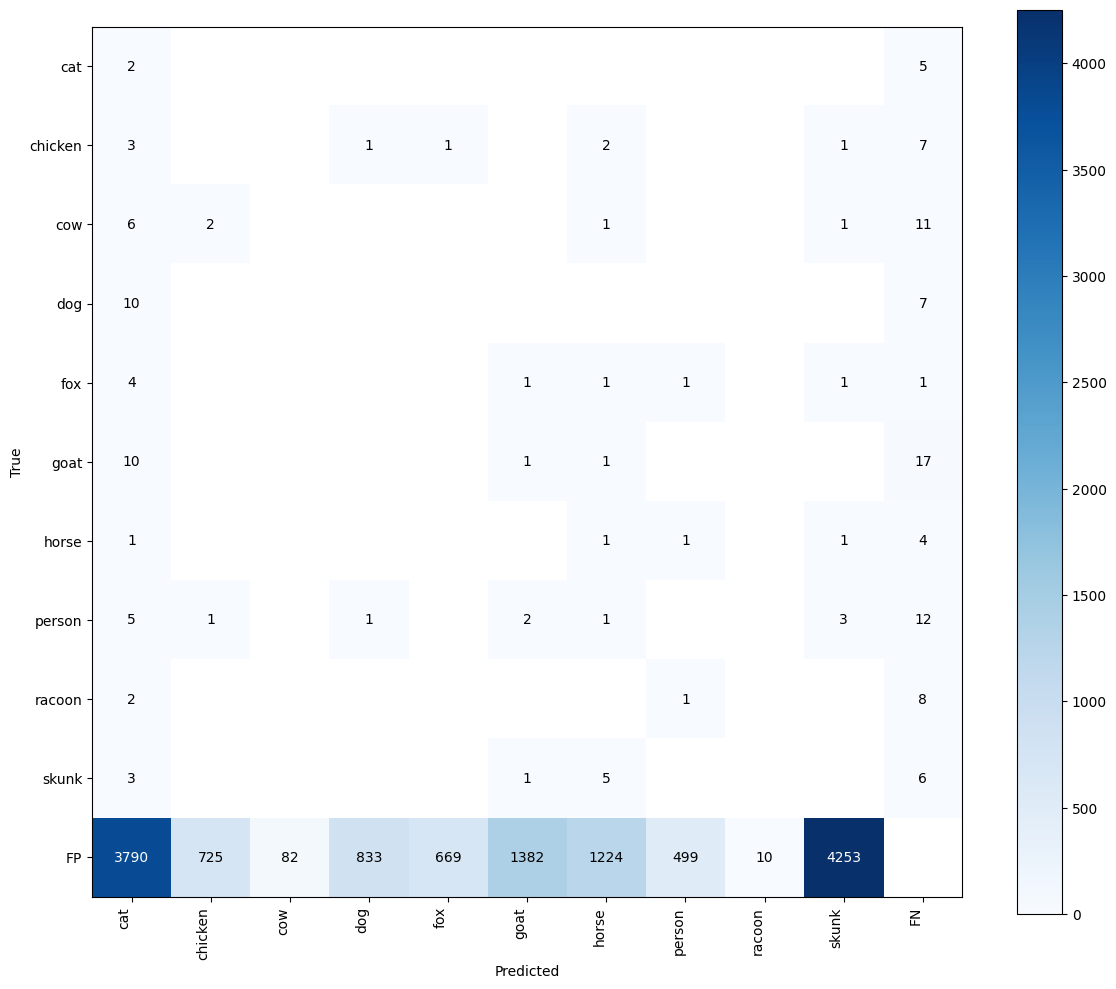

In [23]:
confusion_matrix = sv.ConfusionMatrix.benchmark(
    dataset = ds,
    callback = callback
)

confusion_matrix_plot = confusion_matrix.plot()
confusion_matrix_plot.savefig(f"{HOME}/confusion_matrix.png")

Mean average precision (mAP)

In [21]:
mean_average_precision = sv.MeanAveragePrecision.benchmark(
    dataset = ds,
    callback = callback
)

file_path = f"{HOME}/map_per_class.txt"
with open(file_path, "w") as file:
  file.write(f"mAP: {mean_average_precision.map50_95}\n")
  print('mAP:', mean_average_precision.map50_95)
  per_class_map = mean_average_precision.per_class_ap50_95.mean(axis=1)
  for class_name, value in zip(ds.classes, per_class_map):
      print(f"{class_name}: {value:.2f}")
      file.write(f"{class_name}: {value:.2f}\n")

mAP: 0.005062305317200355
cat: 0.03
chicken: 0.00
cow: 0.00
dog: 0.00
fox: 0.00
goat: 0.00
horse: 0.01
person: 0.00
racoon: 0.00
skunk: 0.00
